#### Alexnet Winner of 2012  ImageNet Large Scale Visual Recognition Challenge

AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor. 



#### Architecture
 
<img src="images/alex1.png" width="500"/>

The first Layer  input  size = 227x227x3 and Convolutional layer with 96 filters of 11x11 , with  padding and stride = 4 

 Output of first Layer is : 55x55x96

Layer 2  MaxPooling layer (3, 3) with the stride of 2,making the output size decrease to 27x27x96,

 Another Convolutional Operation with 384, (3,3) filters having same padding is applied twice giving the output as 13x13x384, followed by another Convulutional Layer with 256 , (3,3) filters and same padding resulting in 13x13x256 output. This is MaxPooled and dimensions are reduced to 6x6x256

Third  Layer is convolutional with  256, (5,5) filters and  padding,  Output is   27x27x256.

Fourth layer MaxPooling again ,reducing the size to 13x13x256.

Convolutional Layer  with 384, (3,3) filters 

The output is  13x13x384 

This is repeated  once

 Followed by another Convulutional Layer with 256 , (3,3) filters and   padding resulting in 13x13x256 output. This is MaxPooled and dimensions are reduced to 6x6x256

 Further the layer is Flatten out and 2 Fully Connected Layers with 4096 units each are made which is further connected to 1000 units softmax layer.

We will try out this on a smaller data set
https://www.kaggle.com/puneet6060/intel-image-classification/data#

This is image data of Natural Scenes around the world.

 
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.

##### Sample data
 
<img src="images/sample.png" width="500"/>

##### Data organization

 
<img src="images/data_org.png" width="500"/>

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator  # Look at this
import keras.backend as K
K.set_image_data_format('channels_last')  # Explained at  https://www.codesofinterest.com/2017/09/keras-image-data-format.html
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

 
<img src="images/alex2.png" width="500"/>

In [2]:
path = 'data/seg_train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 14034 images belonging to 6 classes.


Image Data Generator class in Keras provide a convinient method of handling huge image data set 

In [3]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [4]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [5]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 6)
Image Size of first image :  (227, 227, 3)
Output of first image :  (6,)


##### Plot some sample images from training set with catorgory 

labels in one hot encoding

/home/sunil/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 1. 0.]')

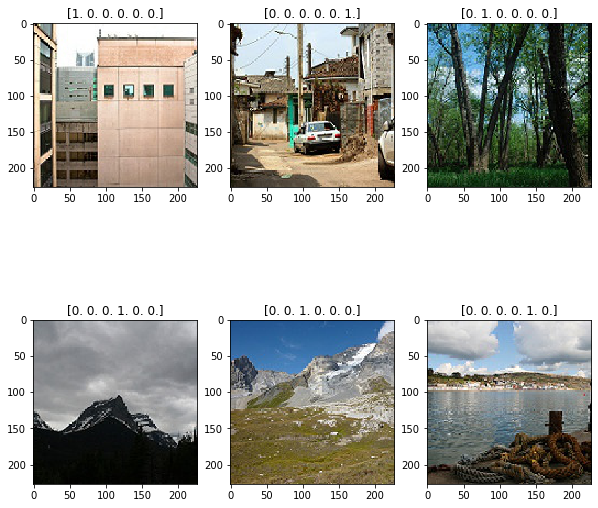

In [6]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [7]:
#### define the alexnet architecture 

In [8]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [9]:
alex = AlexNet(train[0][0].shape[1:])

In [10]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [11]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
alex.fit(train,epochs=50,verbose=1)

Epoch 1/50
332/439 [=====================>........] - ETA: 12:28 - loss: 2.3003 - accuracy: 0.4763

In [ ]:
path_test = 'data/seg_test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

In [ ]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
path_test = 'data/seg_pred'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

In [ ]:
predictions = alex.predict_generator(predict)

In [ ]:
imshow(predict[700][0][0])

In [ ]:
print(predictions[700])

In [ ]:
import os 
def get_category(predicted_output):
    path ="data/seg_train"
    return os.listdir(path)[np.argmax(abc)]

In [ ]:
print(get_category(predictions[700]))

In [ ]:
# SOME CODE for display images from image generator . 

In [ ]:

x,y=next(train) 

In [ ]:
print(type(x))

In [ ]:
show_grid(x,4,8 ,figsize=(20,10))

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')